In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from google.colab import files
#uploaded = files.upload()


In [2]:
# reading the csv file
dataset = pd.read_csv('museumdata.csv', sep=',', parse_dates=['Metadata Date'])


F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473427, 44)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473427 entries, 0 to 473426
Data columns (total 44 columns):
Object Number              473427 non-null object
Is Highlight               473427 non-null bool
Is Public Domain           473427 non-null bool
Object ID                  473427 non-null int64
Department                 473427 non-null object
Object Name                471522 non-null object
Title                      443364 non-null object
Culture                    206207 non-null object
Period                     88762 non-null object
Dynasty                    23134 non-null object
Reign                      11160 non-null object
Portfolio                  23035 non-null object
Artist Role                269363 non-null object
Artist Prefix              88961 non-null object
Artist Display Name        271457 non-null object
Artist Display Bio         232252 non-null object
Artist Suffix              11968 non-null object
Artist Alpha Sort          271423 no

### Initial Dropping of Columns
With a dataset of 44 columns, we dropped all empty columns and all columns with less than 100_000 entries.

In [4]:
#generating the list of bools to on columns to be dropped : True means drop, False means keep
dropping_bool = [value.count() < 100_000 for key, value in dataset.items()]

#zipping the column names against their bools
dropping_zip = zip(dataset.columns,dropping_bool)

#generating the list of columns to be dropped
dropping_cols = []
for a in dropping_zip:
    if a[1] == True:
        dropping_cols.append(a[0])

dropping_cols

['Period',
 'Dynasty',
 'Reign',
 'Portfolio',
 'Artist Prefix',
 'Artist Suffix',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Rights and Reproduction']

In [5]:
dataset = dataset.drop(dropping_cols, axis=1)

In [6]:
#new info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473427, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473427 entries, 0 to 473426
Data columns (total 26 columns):
Object Number          473427 non-null object
Is Highlight           473427 non-null bool
Is Public Domain       473427 non-null bool
Object ID              473427 non-null int64
Department             473427 non-null object
Object Name            471522 non-null object
Title                  443364 non-null object
Culture                206207 non-null object
Artist Role            269363 non-null object
Artist Display Name    271457 non-null object
Artist Display Bio     232252 non-null object
Artist Alpha Sort      271423 non-null object
Artist Nationality     182498 non-null object
Artist Begin Date      234741 non-null object
Artist End Date        232458 non-null object
Object Date            458504 non-null object
Object Begin Date      473427 non-null int64
Object End Date        473427 non-null int64
Medium                 466255 non-null object
Dimensio

In [7]:
dataset.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,The American Wing,Coin,One-dollar Liberty Head Coin,NaN,Maker,James Barton Longacre,...,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,NaT,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,The American Wing,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,Christian Gobrecht,...,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,NaT,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,NaT,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,NaT,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,NaT,"Metropolitan Museum of Art, New York, NY",NaN


### Initial Dropping of Rows
With a dataset of 473_427 entries, we first investigated the uniqueness of each entry and drop entries based on findings

In [29]:
# Checking for uniqueness

dataset['Object ID'].is_unique

True

In [30]:
dataset['Object Number'].is_unique

False

In [31]:
# verify duplicates
#dataset = 
dataset[dataset.duplicated()]

# NO duplicates to be removed

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags


### Investigating outliers in objects with lifespan within the last century(1900-)

Objects that were brought in from 1900 till date and have either been taken out or currently available(2019)


(99168, 26)


,Object Begin Date
count,99168.000000
mean,1941.907369
std,26.775249
min,1901.000000
25%,1920.000000
50%,1936.000000
75%,1961.000000
max,2019.000000


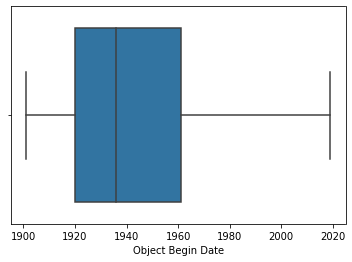

In [21]:
#checking for outliers of objects begin date in the last century 
dataset= dataset[dataset['Object Begin Date']>1900]
sns.boxplot(x=dataset['Object Begin Date'])

print(dataset.shape)
dataset[['Object Begin Date']].describe()

(99168, 26)


,Object End Date
count,99168.000000
mean,1945.926498
std,26.580608
min,1901.000000
25%,1925.000000
50%,1941.000000
75%,1966.000000
max,2099.000000


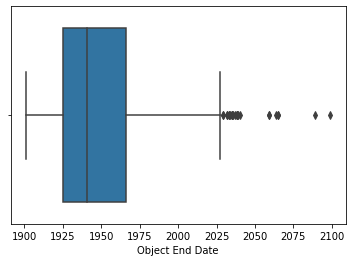

In [33]:
#checking for outliers of objects whose lifespan was within the last century 
dataset= dataset[dataset['Object End Date']>1900]
sns.boxplot(x=dataset['Object End Date'])  

print(dataset.shape)
dataset[['Object End Date']].describe()

In [40]:
# It is found that for objects that
beyond_2025 = dataset[dataset['Object End Date']>2025]
print(f'{beyond_2025.shape[0]} objects were found to be outliers of objects that were added in the last century')
print('These objects have earliest end date as 2025 and last date as 2099')

33 objects were found to be outliers of objects that were added in the last century
These objects have earliest end date as 2025 and last date as 2099


### Other Investigations

In [11]:
dataset['Object ID'].is_unique

True

In [12]:
dataset['Is Public Domain'].value_counts()

False    97889
True      1279
Name: Is Public Domain, dtype: int64

In [13]:
dataset['Classification'].value_counts()

Prints|Ephemera                     17525
Prints                              15910
Photographs                         13195
Drawings                             7421
Negatives                            6082
                                    ...  
Chordophone-Accessories-beater          1
Paintings|Paper-Graphics                1
Portfolios|Photographs                  1
Ornament & Architecture|Drawings        1
Ephemera|Letters                        1
Name: Classification, Length: 425, dtype: int64

In [14]:
dataset['Medium'].value_counts()


Gelatin silver print                             9156
Commercial color lithograph                      7063
Film negative                                    5887
Commercial color photolithograph                 3972
Lithograph                                       3325
                                                 ... 
Graphite, black and white chalk on gray paper       1
cotton, cupro, mother-of-pearl                      1
gold, rock crystal                                  1
Gouache on newsprint mounted on cardboard           1
wool, metallic leather                              1
Name: Medium, Length: 13318, dtype: int64

In [15]:
dataset['Object Begin Date'].sort_values(ascending=False, na_position='last')

470192    2019
466211    2019
464460    2019
464458    2019
466240    2019
          ... 
336914    1901
336915    1901
336916    1901
10696     1901
1         1901
Name: Object Begin Date, Length: 99168, dtype: int64

In [ ]:
most of the ART are from Drawsings and Prints.
ObjectID is unique(no duplicates)
we have 202199 art works in Public domain.
Most of the art work is in Print format.
we have the highest art work from American and French.
Most of the art work is purely from Artists.
we have more of the Art from the Artist Walker Evans, with Kinney brothers in second palce.
we have most of the art from the country Egyp